# Load the dataset

In [94]:
data = pd.read_csv("Churn_Modelling.csv")

<IPython.core.display.Javascript object>

# Pandas Profile

In [57]:
from pandas_profiling import ProfileReport

In [58]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Univariate Analysis

In [95]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
print('Number of numerical variables: ', len(numerical_feature))
data[numerical_feature].head()

Number of numerical variables:  11


RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [96]:
discrete_feature = [feature for feature in numerical_feature if data[feature].nunique() < 25]
print("Number of discrete variable: ",len(discrete_feature))
data[discrete_feature]

Number of discrete variable:  5


Tenure  NumOfProducts  HasCrCard  IsActiveMember  Exited
0          2              1          1               1       1
1          1              1          0               1       0
2          8              3          1               0       1
3          1              2          0               0       0
4          2              1          1               1       0
...      ...            ...        ...             ...     ...
9995       5              2          1               0       0
9996      10              1          1               1       0
9997       7              1          0               1       1
9998       3              2          1               0       1
9999       4              1          1               0       0

[10000 rows x 5 columns]

In [97]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("The number of continous feature: ",len(continous_feature))
data[continous_feature]


The number of continous feature:  6


RowNumber  CustomerId  CreditScore  Age    Balance  EstimatedSalary
0             1    15634602          619   42       0.00        101348.88
1             2    15647311          608   41   83807.86        112542.58
2             3    15619304          502   42  159660.80        113931.57
3             4    15701354          699   39       0.00         93826.63
4             5    15737888          850   43  125510.82         79084.10
...         ...         ...          ...  ...        ...              ...
9995       9996    15606229          771   39       0.00         96270.64
9996       9997    15569892          516   35   57369.61        101699.77
9997       9998    15584532          709   36       0.00         42085.58
9998       9999    15682355          772   42   75075.31         92888.52
9999      10000    15628319          792   28  130142.79         38190.78

[10000 rows x 6 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

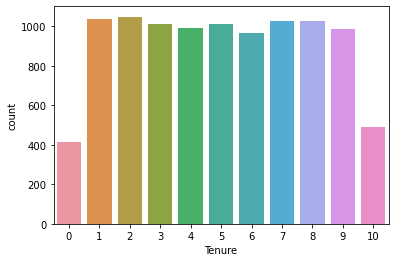

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

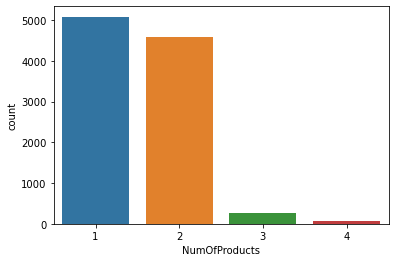

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

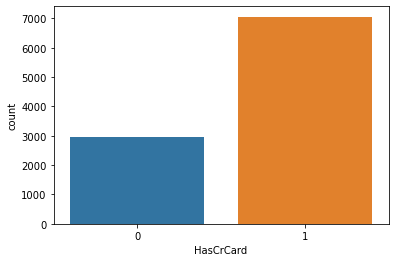

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

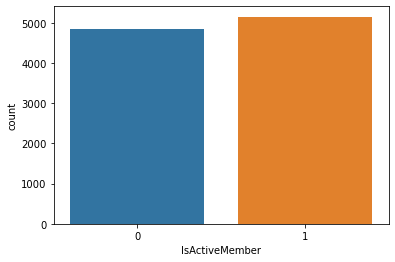

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

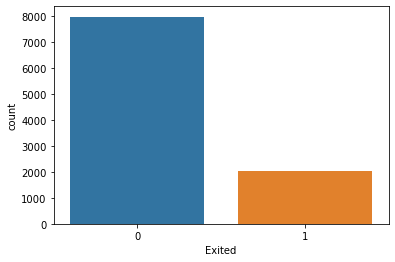

In [98]:
for feature in discrete_feature:
    sns.countplot(x = feature,data=data)
    plt.show()

# Categorical_feature

In [99]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == "O"]
print("The number of Categorical_feature: ",len(categorical_feature))
data[categorical_feature]

The number of Categorical_feature:  3


Surname Geography  Gender
0      Hargrave    France  Female
1          Hill     Spain  Female
2          Onio    France  Female
3          Boni    France  Female
4      Mitchell     Spain  Female
...         ...       ...     ...
9995   Obijiaku    France    Male
9996  Johnstone    France    Male
9997        Liu    France  Female
9998  Sabbatini   Germany    Male
9999     Walker    France  Female

[10000 rows x 3 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

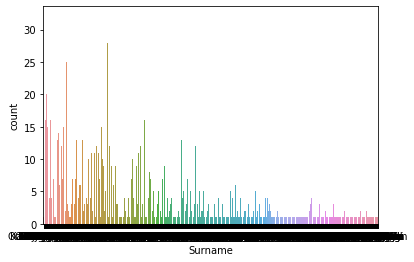

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

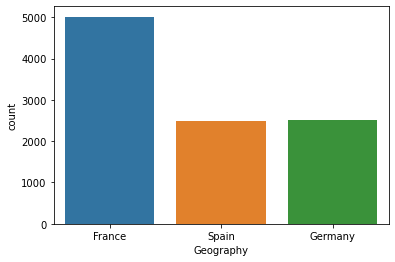

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

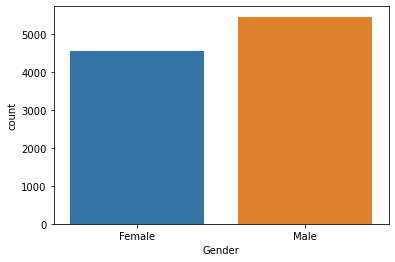

In [100]:
for feature in categorical_feature:
    sns.countplot(x = feature,data=data)
    plt.show()

# Univariate Analysis

In [101]:
yes = data.loc[data["Exited"] == 1]

In [102]:
No = data.loc[data["Exited"] == 0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Balance')

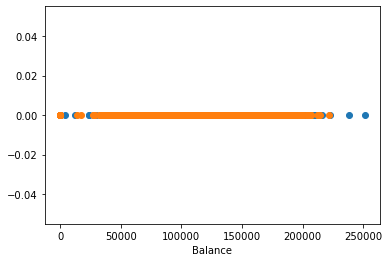

In [103]:
plt.plot(yes["Balance"],np.zeros_like(yes["Balance"]),"o")
plt.plot(No["Balance"],np.zeros_like(No["Balance"]),"o")
plt.xlabel("Balance")

# Bivariate Analysis

<IPython.core.display.Javascript object>

C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

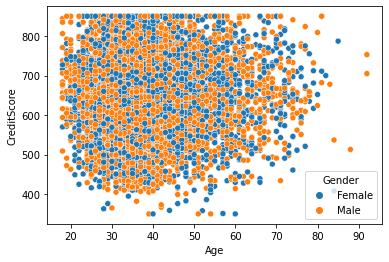

In [104]:
sns.scatterplot(data["Age"],data["CreditScore"],hue=data["Gender"])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Balance'>

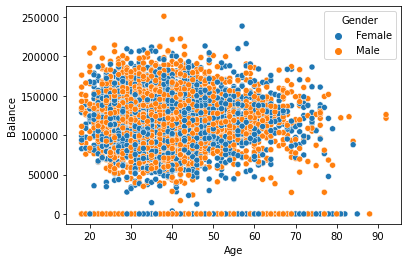

In [105]:
sns.scatterplot(x="Age",y="Balance",hue="Gender",data=data)

# Multivariate Analysis

<IPython.core.display.Javascript object>

C:\Users\VICKY R R\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


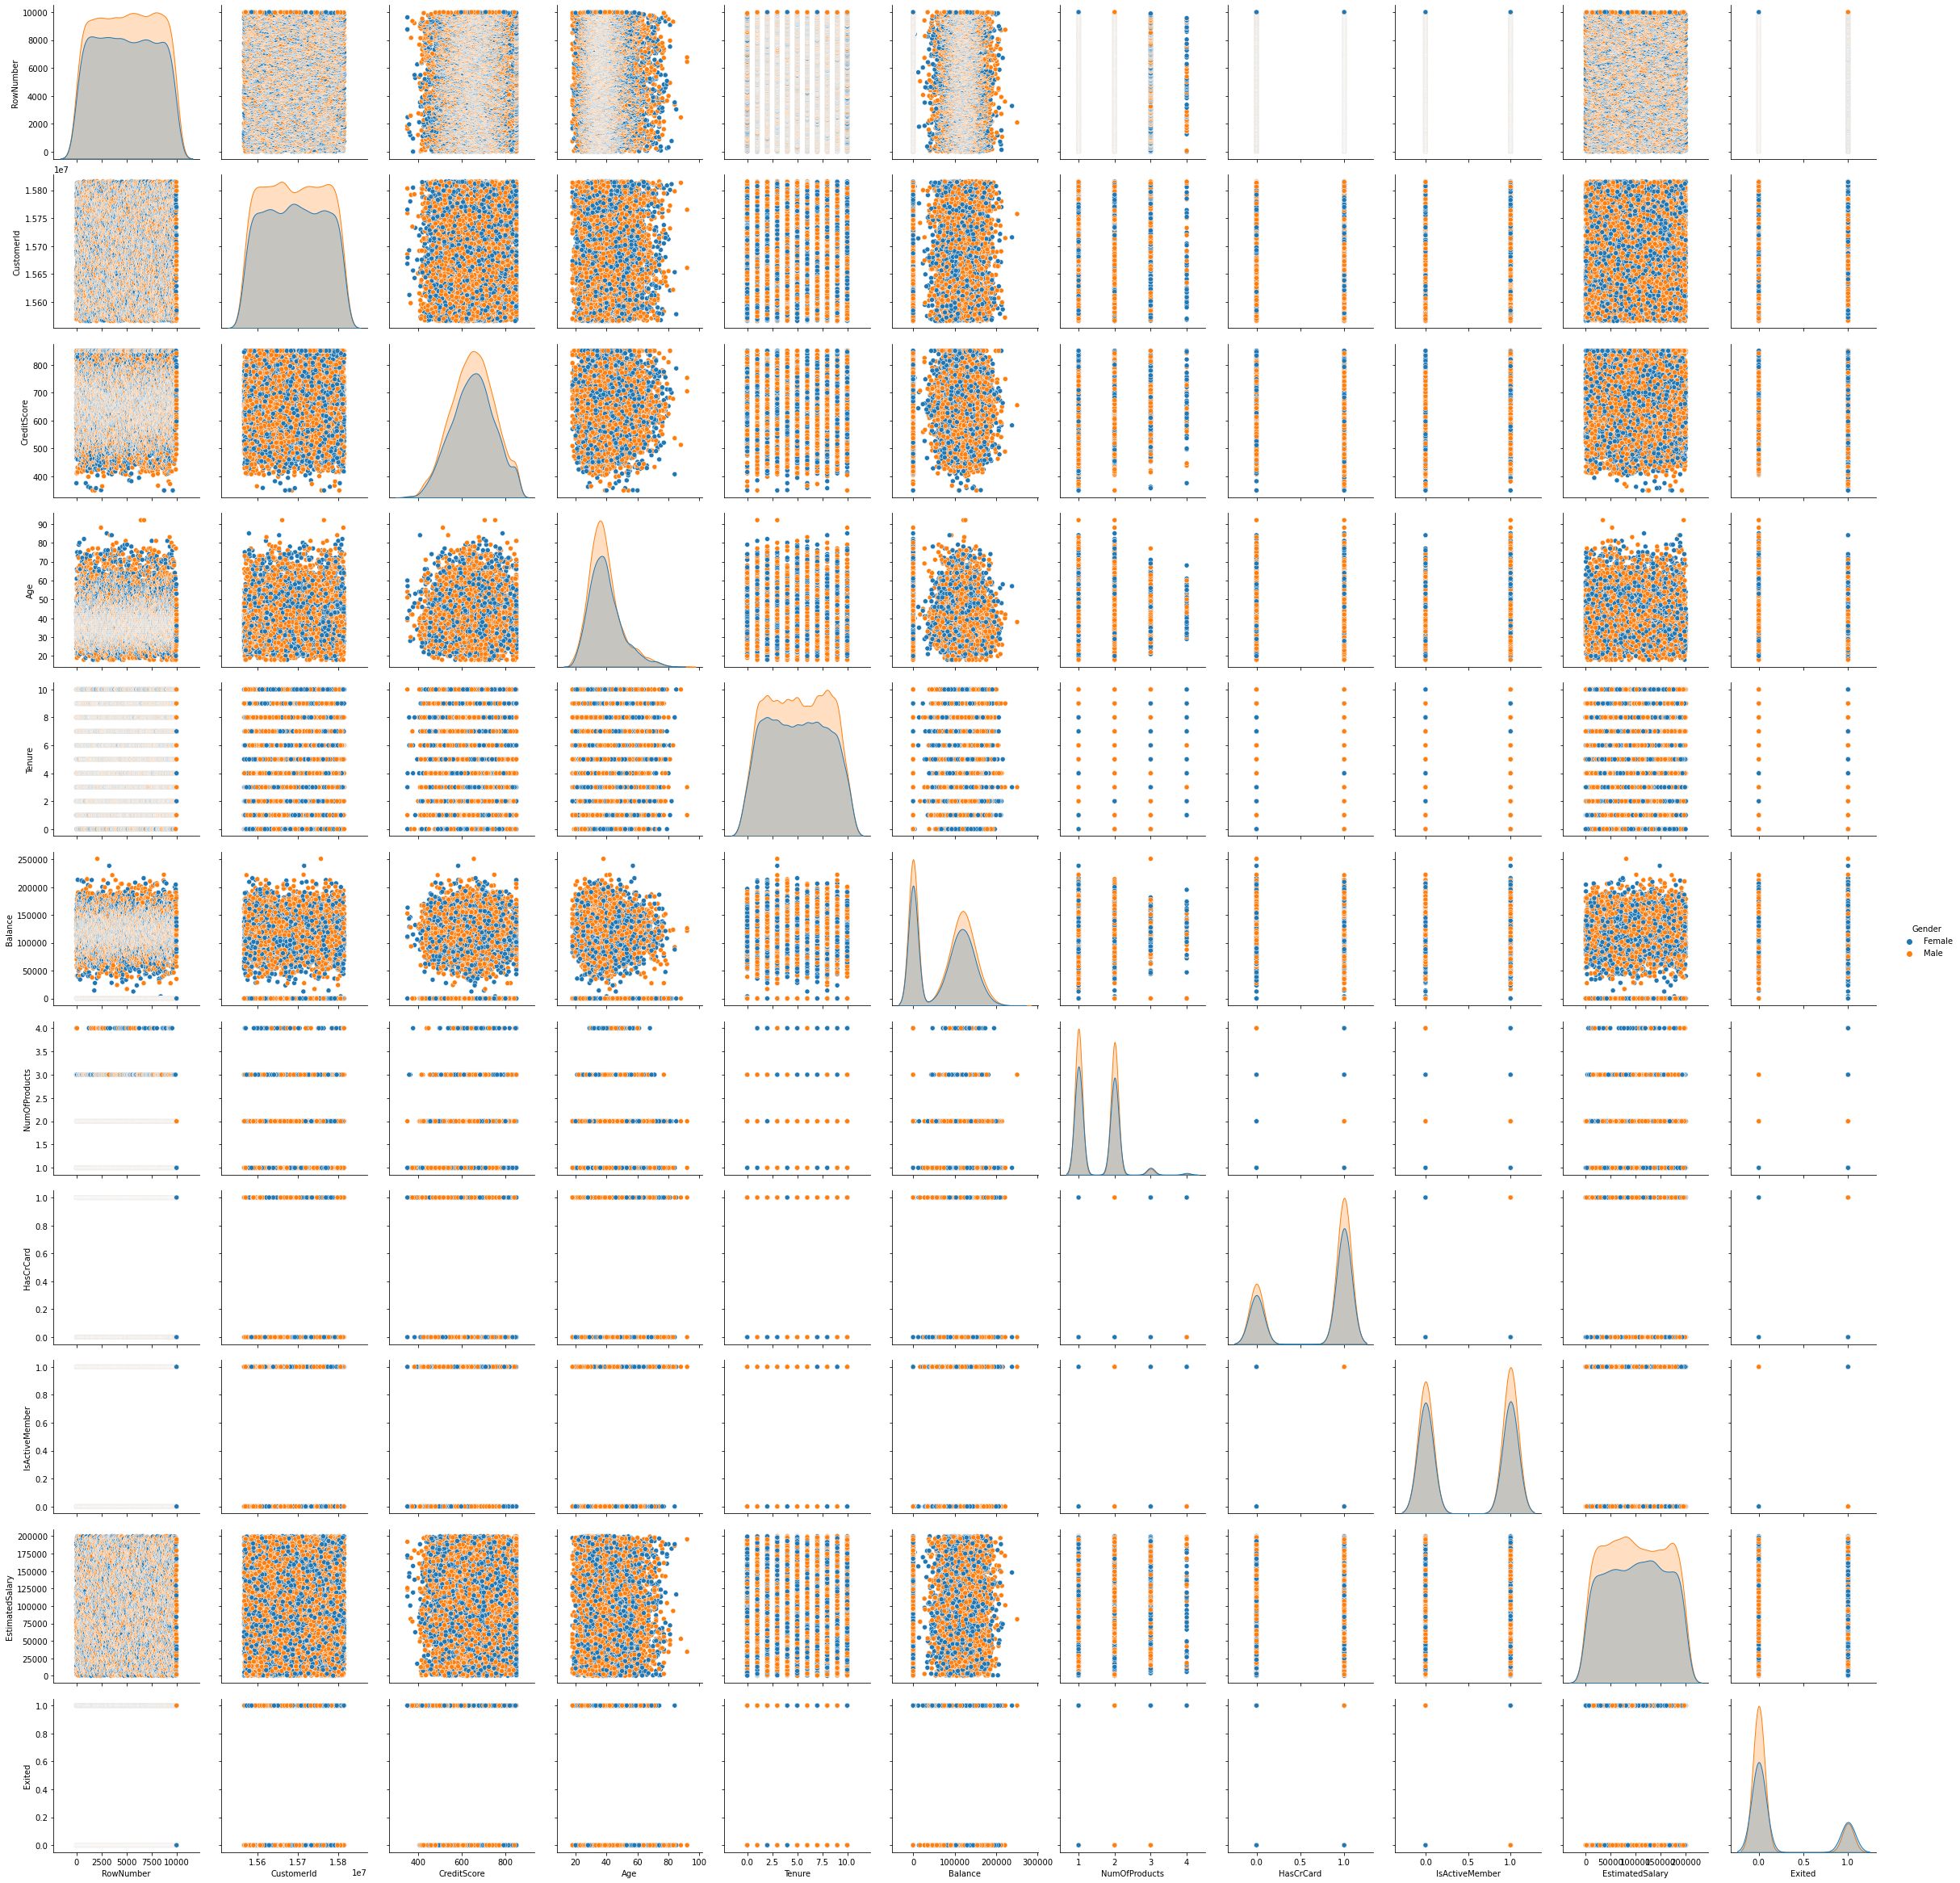

In [71]:
sns.pairplot(data,size=3,hue="Gender")

# Descriptive statistics 

In [72]:
data.mean()

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [73]:
data.median()

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [74]:
data.mode()

RowNumber  CustomerId Surname  CreditScore Geography Gender   Age  \
0             1    15565701   Smith        850.0    France   Male  37.0   
1             2    15565706     NaN          NaN       NaN    NaN   NaN   
2             3    15565714     NaN          NaN       NaN    NaN   NaN   
3             4    15565779     NaN          NaN       NaN    NaN   NaN   
4             5    15565796     NaN          NaN       NaN    NaN   NaN   
...         ...         ...     ...          ...       ...    ...   ...   
9995       9996    15815628     NaN          NaN       NaN    NaN   NaN   
9996       9997    15815645     NaN          NaN       NaN    NaN   NaN   
9997       9998    15815656     NaN          NaN       NaN    NaN   NaN   
9998       9999    15815660     NaN          NaN       NaN    NaN   NaN   
9999      10000    15815690     NaN          NaN       NaN    NaN   NaN   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2.0      0.0            1.0        1.0             1.0   
1        NaN      NaN            NaN        NaN             NaN   
2        NaN      NaN            NaN        NaN             NaN   
3        NaN      NaN            NaN        NaN             NaN   
4        NaN      NaN            NaN        NaN             NaN   
...      ...      ...            ...        ...             ...   
9995     NaN      NaN            NaN        NaN             NaN   
9996     NaN      NaN            NaN        NaN             NaN   
9997     NaN      NaN            NaN        NaN             NaN   
9998     NaN      NaN            NaN        NaN             NaN   
9999     NaN      NaN            NaN        NaN             NaN   

      EstimatedSalary  Exited  
0            24924.92     0.0  
1                 NaN     NaN  
2                 NaN     NaN  
3                 NaN     NaN  
4                 NaN     NaN  
...               ...     ...  
9995              NaN     NaN  
9996              NaN     NaN  
9997              NaN     NaN  
9998              NaN     NaN  
9999              NaN     NaN  

[10000 rows x 14 columns]

In [106]:
# Measure of dispersed
for feature in continous_feature:
    data1 = max(data[feature]) - min(data[feature])
    print(data1)

9999
249989
500
74
250898.09
199980.90000000002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

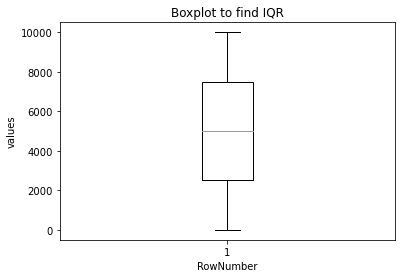

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

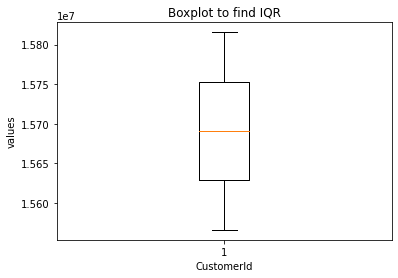

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

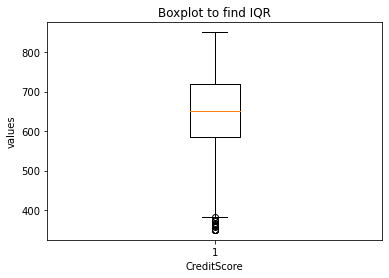

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

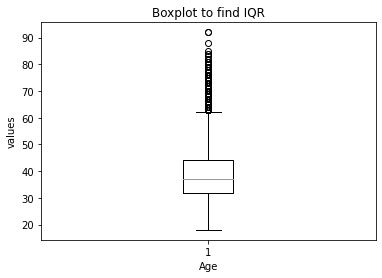

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

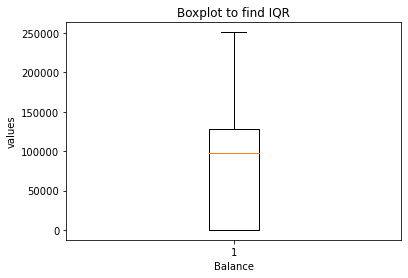

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

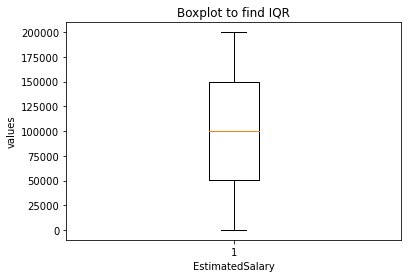

In [107]:
# Boxplot
for feature in continous_feature:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("values")
    plt.title("Boxplot to find IQR")
    plt.show()

In [108]:
data.var()

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


RowNumber          8.334167e+06
CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [109]:
data.std()

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [110]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [111]:
data.skew()

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [112]:
data.kurt()

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


RowNumber         -1.200000
CustomerId        -1.196113
CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

In [113]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

# Handling Missing Values

In [114]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Find and Replace the Outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

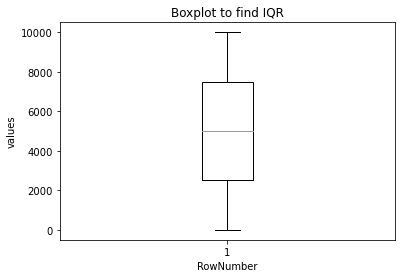

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

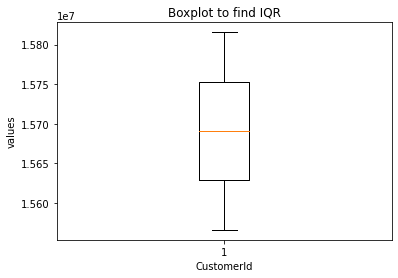

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

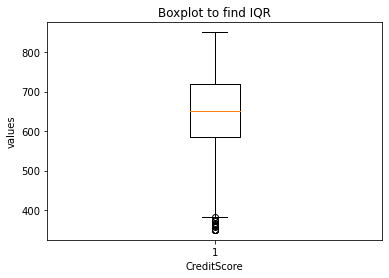

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

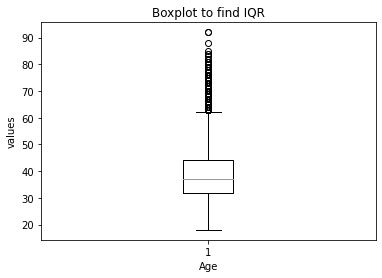

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

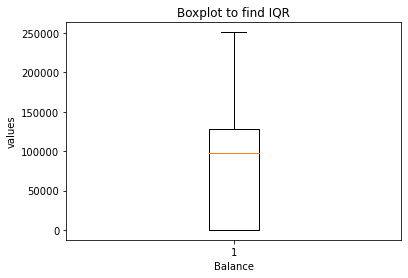

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

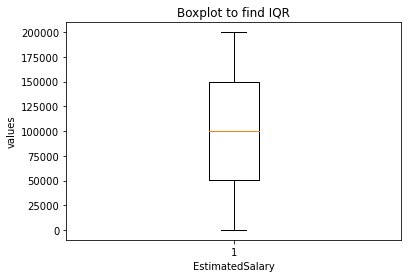

In [115]:
# Boxplot
for feature in continous_feature:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("values")
    plt.title("Boxplot to find IQR")
    plt.show()

In [116]:
Q1 = data["CreditScore"].quantile(0.25)
Q3 = data["CreditScore"].quantile(0.75)
IQR = Q3-Q1
LE = Q1-(1.5*IQR)
UE = Q3+(1.5*IQR)
data["CreditScore"][data["CreditScore"]<LE] = LE

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\1672307464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreditScore"][data["CreditScore"]<LE] = LE


In [117]:
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
IQR = Q3-Q1
LE = Q1-(1.5*IQR)
UE = Q3+(1.5*IQR)
data["Age"][data["Age"]>UE] = UE

C:\Users\VICKY R R\AppData\Local\Temp\ipykernel_18328\313255751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"][data["Age"]>UE] = UE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

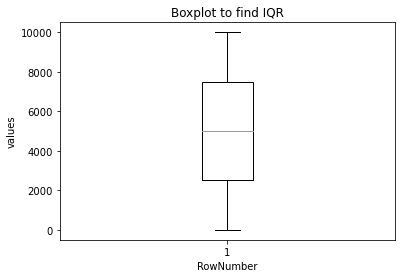

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

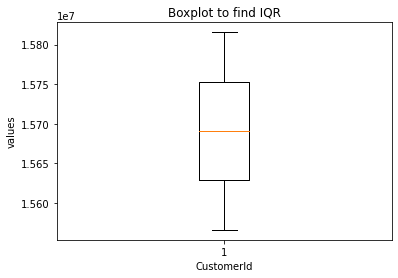

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

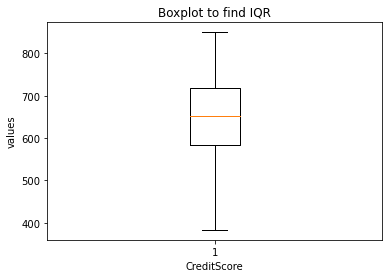

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

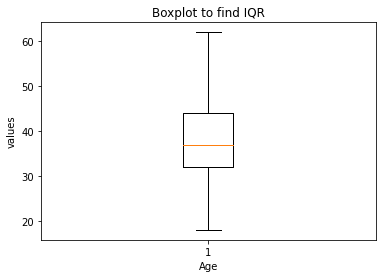

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

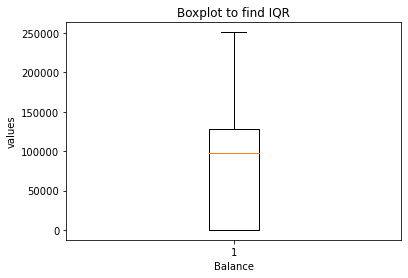

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

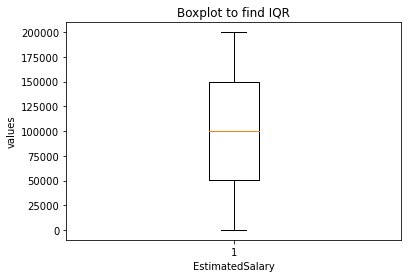

In [118]:
# Boxplot
for feature in continous_feature:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("values")
    plt.title("Boxplot to find IQR")
    plt.show()

# Perform Encoding for Categorical feature

In [120]:
data[categorical_feature].head()

Surname Geography  Gender
0  Hargrave    France  Female
1      Hill     Spain  Female
2      Onio    France  Female
3      Boni    France  Female
4  Mitchell     Spain  Female

In [125]:
data.drop(["Surname"],axis=1,inplace=True)

In [127]:
data.head()

RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602          619    France  Female   42       2   
1          2    15647311          608     Spain  Female   41       1   
2          3    15619304          502    France  Female   42       8   
3          4    15701354          699    France  Female   39       1   
4          5    15737888          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [128]:
dummy = pd.get_dummies(data,columns=['Geography','Gender'])

<IPython.core.display.Javascript object>

In [129]:
dummy

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                    1                  0                0              1   
1                    0                  0                1              1   
2                    1                  0                0              1   
3                    1                  0                0              1   
4                    0                  0                1              1   
...                ...                ...              ...            ...   
9995                 1                  0                0              0   
9996                 1                  0                0              0   
9997                 1                  0                0              1   
9998                 0                  1                0              0   
9999                 1                  0                0              1   

      Gender_Male  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
9995            1  
9996            1  
9997            0  
9998            1  
9999            0  

[10000 rows x 16 columns]

# Spli the data into dependent and independent 

In [144]:
x = dummy.drop(["Exited"],axis=1)
y = dummy["Exited"]

In [145]:
x

RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
0     -1.731878   -0.783213    -0.326878  0.342615 -1.041760 -1.225848   
1     -1.731531   -0.606534    -0.440804  0.240011 -1.387538  0.117350   
2     -1.731185   -0.995885    -1.538636  0.342615  1.032908  1.333053   
3     -1.730838    0.144767     0.501675  0.034803 -1.387538 -1.225848   
4     -1.730492    0.652659     2.065569  0.445219 -1.041760  0.785728   
...         ...         ...          ...       ...       ...       ...   
9995   1.730492   -1.177652     1.247373  0.034803 -0.004426 -1.225848   
9996   1.730838   -1.682806    -1.393640 -0.375612  1.724464 -0.306379   
9997   1.731185   -1.479282     0.605244 -0.273008  0.687130 -1.225848   
9998   1.731531   -0.119356     1.257730  0.342615 -0.695982 -0.022608   
9999   1.731878   -0.870559     1.464868 -1.093840 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0         -0.911583   0.646092        0.970243         0.021886   
1         -0.911583  -1.547768        0.970243         0.216534   
2          2.527057   0.646092       -1.030670         0.240687   
3          0.807737  -1.547768       -1.030670        -0.108918   
4         -0.911583   0.646092        0.970243        -0.365276   
...             ...        ...             ...              ...   
9995       0.807737   0.646092       -1.030670        -0.066419   
9996      -0.911583   0.646092        0.970243         0.027988   
9997      -0.911583  -1.547768        0.970243        -1.008643   
9998       0.807737   0.646092       -1.030670        -0.125231   
9999      -0.911583   0.646092       -1.030670        -1.076370   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0             0.997204          -0.578736        -0.573809       1.095988   
1            -1.002804          -0.578736         1.742740       1.095988   
2             0.997204          -0.578736        -0.573809       1.095988   
3             0.997204          -0.578736        -0.573809       1.095988   
4            -1.002804          -0.578736         1.742740       1.095988   
...                ...                ...              ...            ...   
9995          0.997204          -0.578736        -0.573809      -0.912419   
9996          0.997204          -0.578736        -0.573809      -0.912419   
9997          0.997204          -0.578736        -0.573809       1.095988   
9998         -1.002804           1.727904        -0.573809      -0.912419   
9999          0.997204          -0.578736        -0.573809       1.095988   

      Gender_Male  
0       -1.095988  
1       -1.095988  
2       -1.095988  
3       -1.095988  
4       -1.095988  
...           ...  
9995     0.912419  
9996     0.912419  
9997    -1.095988  
9998     0.912419  
9999    -1.095988  

[10000 rows x 15 columns]

In [146]:
y

0       1.977165
1      -0.505775
2       1.977165
3      -0.505775
4      -0.505775
          ...   
9995   -0.505775
9996   -0.505775
9997    1.977165
9998    1.977165
9999   -0.505775
Name: Exited, Length: 10000, dtype: float64

# Scaled the independent feature

In [147]:
 from sklearn.preprocessing import StandardScaler   

In [148]:
for col in dummy:
    ss = StandardScaler()
    dummy[col] = ss.fit_transform(dummy[[col]])

In [149]:
dummy

RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
0     -1.731878   -0.783213    -0.326878  0.342615 -1.041760 -1.225848   
1     -1.731531   -0.606534    -0.440804  0.240011 -1.387538  0.117350   
2     -1.731185   -0.995885    -1.538636  0.342615  1.032908  1.333053   
3     -1.730838    0.144767     0.501675  0.034803 -1.387538 -1.225848   
4     -1.730492    0.652659     2.065569  0.445219 -1.041760  0.785728   
...         ...         ...          ...       ...       ...       ...   
9995   1.730492   -1.177652     1.247373  0.034803 -0.004426 -1.225848   
9996   1.730838   -1.682806    -1.393640 -0.375612  1.724464 -0.306379   
9997   1.731185   -1.479282     0.605244 -0.273008  0.687130 -1.225848   
9998   1.731531   -0.119356     1.257730  0.342615 -0.695982 -0.022608   
9999   1.731878   -0.870559     1.464868 -1.093840 -0.350204  0.859965   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
0         -0.911583   0.646092        0.970243         0.021886  1.977165   
1         -0.911583  -1.547768        0.970243         0.216534 -0.505775   
2          2.527057   0.646092       -1.030670         0.240687  1.977165   
3          0.807737  -1.547768       -1.030670        -0.108918 -0.505775   
4         -0.911583   0.646092        0.970243        -0.365276 -0.505775   
...             ...        ...             ...              ...       ...   
9995       0.807737   0.646092       -1.030670        -0.066419 -0.505775   
9996      -0.911583   0.646092        0.970243         0.027988 -0.505775   
9997      -0.911583  -1.547768        0.970243        -1.008643  1.977165   
9998       0.807737   0.646092       -1.030670        -0.125231  1.977165   
9999      -0.911583   0.646092       -1.030670        -1.076370 -0.505775   

      Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0             0.997204          -0.578736        -0.573809       1.095988   
1            -1.002804          -0.578736         1.742740       1.095988   
2             0.997204          -0.578736        -0.573809       1.095988   
3             0.997204          -0.578736        -0.573809       1.095988   
4            -1.002804          -0.578736         1.742740       1.095988   
...                ...                ...              ...            ...   
9995          0.997204          -0.578736        -0.573809      -0.912419   
9996          0.997204          -0.578736        -0.573809      -0.912419   
9997          0.997204          -0.578736        -0.573809       1.095988   
9998         -1.002804           1.727904        -0.573809      -0.912419   
9999          0.997204          -0.578736        -0.573809       1.095988   

      Gender_Male  
0       -1.095988  
1       -1.095988  
2       -1.095988  
3       -1.095988  
4       -1.095988  
...           ...  
9995     0.912419  
9996     0.912419  
9997    -1.095988  
9998     0.912419  
9999    -1.095988  

[10000 rows x 16 columns]

# Split the data into training and testing

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [154]:
print(
    X_train,
    X_test,
    y_train,
    y_test)

      RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
4016  -0.340694    1.373681    -1.766488  0.137407  0.341352  1.158836   
7245   0.777864    1.009813     0.532746 -0.273008 -1.041760  0.461244   
3668  -0.461245   -1.457025     0.159897  0.547823 -1.041760  0.734500   
7499   0.865852    1.378686    -0.430447  2.394693  0.341352  0.590298   
3561  -0.498311   -1.065422     0.501675 -0.786028  1.724464  0.790969   
...         ...         ...          ...       ...       ...       ...   
373   -1.602667   -0.039851     1.568437 -0.786028 -1.387538  0.777761   
9551   1.576686   -0.033053     0.449891 -0.786028 -0.350204  1.049830   
6217   0.421754   -0.279075     0.439534 -0.786028 -1.041760 -1.225848   
194   -1.664674   -0.163216    -0.730797 -0.991236  1.378686 -0.236808   
5556   0.192777    0.236630    -0.461517  0.137407  0.341352  0.689422   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4016      -0.911583  -1.547768        0.9702